## Power Quality Classification Using ML

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Data Pre-Processing 

In [2]:
col_names=[i for i in range(128)]
data1=pd.read_csv('Voltage_L1_DataSet1.csv',names=col_names)

In [3]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-2464.190673,-2925.256244,-3358.931979,-3760.652243,-4124.939861,-4449.055880,-4732.086714,-4971.292771,-5158.457976,-5299.060129,...,2644.052851,2168.379577,1671.705859,1157.686541,634.536384,104.083017,-427.284371,-954.999435,-1472.671036,-1976.648032
1,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
2,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
3,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
4,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684


#### Treating Null Values 

In [5]:
data1.tail()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
11895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data1.isnull().sum()

0      5900
1      5900
2      5900
3      5900
4      5900
       ... 
123    5900
124    5900
125    5900
126    5900
127    5900
Length: 128, dtype: int64

In [9]:
data1=data1.dropna()
data1.shape

(6000, 128)

In [10]:
data1.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
123    0
124    0
125    0
126    0
127    0
Length: 128, dtype: int64

In [ ]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,-2464.190673,-2925.256244,-3358.931979,-3760.652243,-4124.939861,-4449.055880,-4732.086714,-4971.292771,-5158.457976,-5299.060129,-5387.621664,-5425.054710,-5409.533070,-5341.971839,-5223.281201,-5054.376368,-4836.168369,-4573.223588,-4266.455769,-3915.863360,-3530.576674,-3109.682461,-2659.573315,-2183.899008,-1687.226364,-1174.119830,-650.056949,-119.602433,411.763916,938.566132,1457.150781,1962.040853,2446.844691,2908.823187,3342.499279,3743.306206,4108.506856,4433.536272,4716.566376,4955.772680,...,-1689.051919,-1175.032262,-651.882744,-120.516066,410.851403,937.653413,1456.238399,1960.214696,2445.931971,2907.910689,3341.585709,3743.306544,4107.594715,4432.622864,4715.653438,4954.859274,5142.025125,5282.626834,5372.101699,5408.621318,5394.013731,5326.451254,5207.761351,5037.943127,4819.735896,4557.703784,4250.935882,3899.430274,3514.143809,3093.249847,2644.052851,2168.379577,1671.705859,1157.686541,634.536384,104.083017,-427.284371,-954.999435,-1472.671036,-1976.648032
1,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,-4904.643864,-5107.330184,-5261.626825,-5366.622879,-5418.663525,-5419.576973,-5367.535249,-5264.365732,-5110.069166,-4906.470001,-4656.307539,-4364.146538,-4024.510575,-3650.179436,-3239.328934,-2797.436518,-2329.066729,-1837.871278,-1329.329968,-808.005760,-278.465093,252.902023,782.442935,1303.766529,1812.308746,2303.502822,2772.785644,3215.592255,3626.442570,4002.599102,...,-3239.328487,-2797.435948,-2329.066521,-1837.871910,-1329.329479,-808.005477,-279.377475,252.901869,781.530215,1303.767033,1812.308177,2304.416161,2773.699506,3215.591849,3627.355635,4002.598697,4340.409797,4635.308762,4889.123899,5091.809794,5246.107486,5351.102295,5403.143675,5403.143732,5351.102775,5247.932927,5093.636278,4889.123913,4639.874673,4346.800923,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
2,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,4839.821272,4801.475225,4735.739730,4633.482680,4480.098867,4263.717062,3982.513234,3625.529989,3194.592586,2690.615580,2121.815686,1499.149171,836.309474,150.645858,-539.583464,-1214.291896,-1857.957949,-2453.234297,-2987.340713,-3452.058138,-3842.822995,-4158.721282,-4403.405653,-4583.267220,-4709.261054,-4793.257930,-4839.820962,-4866.297128,-4879.079514,-4882.731612,...,-542.322021,-1217.030331,-1860.696745,-2455.060932,-2989.166228,-3453.883859,-3844.648379,-4159.634438,-4404.318373,-4583.266716,-4709.261622,-4793.257592,-4839.820102,-4866.297534,-4879.079451,-4882.732017,-4881.818474,-4873.601984,-4855.341237,-4817.908616,-4751.259069,-4649.003265,-4496.531718,-4279.237302,-3998.032706,-3641.049793,-3210.112473,-2706.135664,-2137.335549,-1514.668783,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
3,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,-5091.809174,-5014.204029,-4900.078226,-4746.694853,-4552.225090,-4306.628130,-4008.988999,-3659.309075,-3255.763095,-2801.088514,-2298.024633,-1753.875216,-1176.858860,-577.929348,31.955483,640.927176,1237.117177,1809.569762,2349.153124,2845.826291,3295.022824,3691.265717,4034.554320,4323.975530,4561.356298,4753.998880,4902.818171,5009.640226,5084.505985,5125.590961,...,30.129927,640.014744,1236.204383,1808.656128,2348.240611,2844.913572,3294.110443,3691.265562,4033.641600,4323.976034,4561.355729,4753.999218,4902.819032,5009.639820,5083.593047,5125.590557,5138.373119,5121.938568,5076.289209,4998.683639,4884

#### Finding Correlation between Data Features 

<AxesSubplot:>

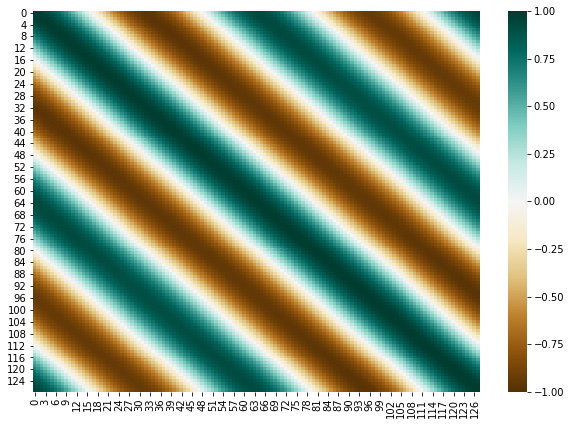

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(data1.corr(),vmin=-1, vmax=1, cmap='BrBG')

In [ ]:
data1.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,1.000000,0.990863,0.976753,0.952708,0.920379,0.879712,0.831326,0.774718,0.710848,0.641221,0.563950,0.482395,0.396321,0.304921,0.210685,0.114079,0.017626,-0.079939,-0.177465,-0.271803,-0.363844,-0.452042,-0.536378,-0.613583,-0.683791,-0.750389,-0.806317,-0.856358,-0.897494,-0.929411,-0.952545,-0.967306,-0.973084,-0.968272,-0.953993,-0.929271,-0.898328,-0.857996,-0.810434,-0.755719,...,-0.663052,-0.724004,-0.779649,-0.826415,-0.864802,-0.895810,-0.918332,-0.931675,-0.935248,-0.930265,-0.916108,-0.892867,-0.861835,-0.821667,-0.775726,-0.722173,-0.659865,-0.594229,-0.517866,-0.441188,-0.358183,-0.270014,-0.180594,-0.087902,0.005088,0.098872,0.192891,0.285414,0.374086,0.458829,0.539911,0.614397,0.682506,0.744624,0.799977,0.847121,0.887535,0.919003,0.941647,0.955655
1,0.990863,1.000000,0.990991,0.975942,0.951701,0.919386,0.878402,0.830573,0.772742,0.709230,0.637652,0.561183,0.479713,0.392092,0.300790,0.206273,0.110908,0.013392,-0.085039,-0.181280,-0.276196,-0.368026,-0.456880,-0.539206,-0.615100,-0.687995,-0.750624,-0.808058,-0.856885,-0.897048,-0.928870,-0.952697,-0.967769,-0.972263,-0.967303,-0.952206,-0.928651,-0.896847,-0.856867,-0.809352,...,-0.597513,-0.664403,-0.726561,-0.780281,-0.825947,-0.865029,-0.896027,-0.918093,-0.930296,-0.934464,-0.929270,-0.914782,-0.892055,-0.859879,-0.821345,-0.774917,-0.719743,-0.658948,-0.589948,-0.516341,-0.438293,-0.353967,-0.266883,-0.176655,-0.084784,0.008775,0.103622,0.197966,0.289218,0.377962,0.463024,0.542287,0.616492,0.684140,0.745961,0.800081,0.848119,0.887529,0.918357,0.941725
2,0.976753,0.990991,1.000000,0.991563,0.976653,0.952749,0.920103,0.879535,0.830471,0.773321,0.708152,0.637333,0.561063,0.477936,0.390304,0.298711,0.205282,0.108692,0.010204,-0.087142,-0.184241,-0.279085,-0.371965,-0.458985,-0.540232,-0.619093,-0.688134,-0.752686,-0.808878,-0.857048,-0.897362,-0.930135,-0.954498,-0.968397,-0.973087,-0.967364,-0.953090,-0.929557,-0.897950,-0.858180,...,-0.526123,-0.598634,-0.667004,-0.727352,-0.780217,-0.826925,-0.866185,-0.896727,-0.918058,-0.931050,-0.935116,-0.929766,-0.915791,-0.892201,-0.861610,-0.822807,-0.775161,-0.720509,-0.657577,-0.590236,-0.516277,-0.436586,-0.353475,-0.265478,-0.175722,-0.083128,0.011698,0.107049,0.200372,0.291802,0.380818,0.464638,0.543544,0.618184,0.685508,0.746285,0.801600,0.848678,0.887792,0.919701
3,0.952708,0.975942,0.991563,1.000000,0.991709,0.977037,0.952753,0.920753,0.879358,0.830320,0.771960,0.707504,0.637094,0.559174,0.476043,0.388265,0.297741,0.203110,0.105654,0.008265,-0.089971,-0.186878,-0.282889,-0.373850,-0.459772,-0.543938,-0.618809,-0.689893,-0.752930,-0.808538,-0.856858,-0.898133,-0.931444,-0.954546,-0.968768,-0.972605,-0.967541,-0.953349,-0.929832,-0.898754,...,-0.449593,-0.527110,-0.601115,-0.667530,-0.726964,-0.780829,-0.827717,-0.866372,-0.896312,-0.918235,-0.931292,-0.935209,-0.930227,-0.915564,-0.893349,-0.862633,-0.822899,-0.775505,-0.719193,-0.657321,-0.589585,-0.513922,-0.435912,-0.351854,-0.264674,-0.174169,-0.080343,0.014956,0.109322,0.202778,0.294689,0.382559,0.465656,0.544603,0.618901,0.685304,0.747358,0.801540,0.848424,0.888553
4,0.920379,0.951701,0.976653,0.991709,1.000000,0.991797,0.976600,0.953059,0.920219,0.878866,0.829082,0.770851,0.706819,0.634635,0.556631,0.473407,0.386596,0.294844,0.199396,0.102986,0.004642,-0.093316,-0.191504,-0.285541,-0.375372,-0.464131,-0.544198,-0.621180,-0.690446,-0.752927,-0.808632,-0.857843,-0.899581,-0.931478,-0.954942,-0.968104,-0.972371,-0.967530,-0.953390,-0.930406,...,-0.369489,-0.451352,-0.530330,-0.602213,-0.667637,-0.728035,-0.782096,-0.828058,-0.866163,-0.896505,-0.918420,-0.931313,-0.935350,-0.929760,-0.916158,-0.893899,-0.862374,-0.822427,-0.773510,-0.718309,-0.656165,-0.587024,-0.512938,-0.433628,-0.350130,-0.262032,

In [14]:
data2=pd.read_csv('Voltage_L1_DataSet2.csv',names=col_names)

In [15]:
data2.shape

(6000, 128)

In [ ]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,-4079.423420,-3707.734514,-3300.341749,-2860.906131,-2394.006186,-1905.134733,-1396.121912,-875.208453,-345.139021,188.591309,719.575600,1244.151093,1755.910641,2251.190671,2724.499037,3172.174014,3588.721326,4120.621043,4445.620212,4729.422432,4969.280884,5156.956131,5297.941481,5386.744103,5423.363946,5407.799984,5340.054575,5221.040774,5051.674494,4831.957140,4569.211541,4260.691688,3909.142885,3522.806754,3100.765313,2649.428425,2172.458402,1674.432229,1159.926472,634.434638,...,5423.364296,5407.800281,5340.969836,5221.955933,5051.675201,4832.872592,4569.211714,4261.606710,3910.059130,3523.721765,3101.680453,2650.343902,2173.373895,1675.347587,1160.841629,635.350225,104.366810,-428.448514,-957.602170,-1477.600846,-1982.951212,-2469.076387,-2932.314559,-3366.256296,-3769.072038,-4135.267874,-4460.266860,-4744.069262,-4983.927939,-5172.518148,-5312.588575,-5402.306276,-5438.926563,-5424.278739,-5357.447199,-5238.433473,-5069.068331,-4849.350422,-4587.520555,-4279.915768
1,-4918.927835,-4668.999112,-4375.127119,-4034.564431,-3659.213495,-3247.243211,-2804.145676,-2333.584172,-1841.965323,-1332.037736,-808.377367,-278.308933,254.506887,784.575542,1308.235862,1818.164165,2310.697156,2781.259036,3225.271917,3637.242750,4014.424716,4352.240339,4648.859005,4902.449844,5105.688883,5260.406079,5365.688297,5417.871144,5417.870532,5365.687865,5262.237541,5107.520025,4902.449637,4652.521530,4358.648701,4019.001605,3642.735492,3230.765388,2787.667859,2318.020920,...,5105.689233,5260.406376,5365.688069,5417.870813,5417.871239,5366.603317,5262.237714,5107.519556,4903.365881,4652.521051,4358.648351,4019.001592,3642.735495,3230.765256,2788.583015,2318.021017,1826.403675,1315.560114,793.730379,262.745822,-270.069247,-801.053437,-1323.798465,-1833.725880,-2326.259651,-2796.821357,-3239.918565,-3652.805070,-4029.071772,-4367.802356,-4663.506099,-4918.012016,-5121.251501,-5275.969344,-5381.249941,-5433.432863,-5434.348878,-5382.165656,-5278.715575,-5123.997634
2,2920.413836,2376.612648,1773.304349,1123.306756,444.013104,-248.097664,-933.799415,-1594.783666,-2213.654301,-2776.681104,-3272.876698,-3696.748942,-4044.634592,-4320.197220,-4527.097994,-4673.576088,-4806.322831,-4853.012854,-4879.561881,-4892.378451,-4896.040365,-4895.125096,-4886.885810,-4868.575925,-4831.040592,-4765.125936,-4661.674697,-4508.787940,-4291.817400,-4009.846183,-3651.889500,-3220.693357,-2715.343432,-2144.992415,-1519.713189,-855.067653,-167.534277,523.661181,1201.123527,1846.543522,...,-4831.040242,-4764.210149,-4661.674926,-4507.872781,-4290.901203,-4008.930731,-3650.973837,-3217.947354,-2712.596207,-2142.246424,-1516.967069,-852.321196,-164.787804,527.323010,1203.869664,1848.374599,2445.274979,2981.752084,3447.736160,3838.650127,4155.409865,4400.761275,4580.197149,4706.535349,4790.760336,4837.450533,4863.999743,4875.900641,4880.477819,4879.563079,4871.323226,4852.098262,4814.562485,4748.647181,4645.197563,4492.310731,4274.423564,3991.537412,3633.580485,3201.469277
3,-2808.723170,-2303.372710,-1758.656432,-1180.066319,-579.504820,32.957795,643.590017,1241.404644,1815.417600,2356.471851,2854.498498,3304.003804,3702.242579,4046.466745,4336.677092,4574.704837,4766.957077,4916.181934,5023.294461,5098.364940,5139.562041,5152.378681,5135.899735,5090.125313,5011.393404,4897.872002,4743.155034,4548.155555,4301.888108,4003.438606,3652.805957,3247.244154,2791.329481,2285.979638,1741.262524,1162.672513,562.111328,-49.435617,-660.067834,-1257.883386,...,5012.309244,4897.872299,4744.070295,4549.070714,4302.804305,4004.354058,3653.721620,3249.074666,2792.245726,2288.725629,1743.093154,1164.503480,564.857801,-47.604769,-657.321697,-1256.052309,-1830.063758,-2370.203003,-2868.229995,-3318.651424,-3715.973959,-4060.198170,-

#### Combining the Input and Output Datasets 

In [16]:
data=pd.concat([data1,data2])

In [17]:
data.shape

(12000, 128)

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-2464.190673,-2925.256244,-3358.931979,-3760.652243,-4124.939861,-4449.055880,-4732.086714,-4971.292771,-5158.457976,-5299.060129,...,2644.052851,2168.379577,1671.705859,1157.686541,634.536384,104.083017,-427.284371,-954.999435,-1472.671036,-1976.648032
1,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
2,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
3,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
4,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684


In [19]:
data.reset_index(inplace=True,drop=True)
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-2464.190673,-2925.256244,-3358.931979,-3760.652243,-4124.939861,-4449.055880,-4732.086714,-4971.292771,-5158.457976,-5299.060129,...,2644.052851,2168.379577,1671.705859,1157.686541,634.536384,104.083017,-427.284371,-954.999435,-1472.671036,-1976.648032
1,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
2,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
3,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
4,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-2559.506480,-2032.758277,-1451.098940,-858.252650,-299.981913,68.131815,0.000799,40.675881,52.878717,71.182601,...,-6001.672502,-5959.979895,-5883.713610,-5696.605756,-5462.722047,-5202.398569,-4867.842027,-4573.961696,-4172.291112,-3737.062497
11996,-5903.034108,-5742.365573,-5486.110384,-5207.482475,-4847.504891,-4488.543155,-4046.196413,-3614.019464,-3107.609077,-2559.506564,...,-4459.053460,-4886.146205,-5145.452948,-5410.860237,-5682.369847,-5768.805166,-5878.628664,-5957.946216,-5971.165921,-6001.671994
11997,-61.177211,-670.042497,-1249.082477,-1837.467121,-2388.422613,-2928.476587,-3455.128977,-3916.358235,-4348.661905,-4762.331598,...,5045.573142,4676.460927,4255.209133,3825.542606,3319.478597,2812.997831,2281.814658,1696.762241,1126.421734,516.713927
11998,474.479154,-128.850780,-729.827759,-1316.385901,-1895.899437,-2450.305884,-2989.118773,-3496.978647,-3964.037680,-4404.918464,...,5320.112627,5002.133416,4634.596230,4222.163396,3770.392539,3286.430795,2761.417139,2219.856080,1647.914351,1068.422217


In [20]:
out_data1=pd.read_csv('OutputFor_DataSet1.csv',names=['output'])
out_data2=pd.read_csv('OutputFor_DataSet2.csv',names=['output'])

In [21]:
out_data=pd.concat([out_data1,out_data2])
out_data.reset_index(inplace=True,drop=True)

In [22]:
out_data.shape

(12000, 1)

### Splitting the Train and Test Data 

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,out_data,test_size=0.33, random_state=21)

In [24]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(8040, 128) (8040, 1)
(3960, 128) (3960, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Scaling and Transforming the datasets using PCA (Principal Component Analysis)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
train_sc= scaler.transform(x_train)
from sklearn.decomposition import PCA
pca = PCA(.95)

In [ ]:
pca = PCA(50)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

50

In [ ]:
test_sc=scaler.transform(x_test)
train_sc= scaler.transform(x_train)

In [ ]:
train_sc = pca.transform(train_sc)
test_sc = pca.transform(test_sc)

#### Logistic Regression Model 

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs',max_iter=2000)
logreg.fit(train_sc, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(test_sc)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_sc, y_test)))

Accuracy of logistic regression classifier on test set: 0.26


In [ ]:
logisticRegr1 = LogisticRegression(solver = 'lbfgs',max_iter=1000)
logisticRegr1.fit(scaler.transform(x_train), y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(scaler.transform(x_test), y_test)))

Accuracy of logistic regression classifier on test set: 0.64


### Building a Keras Model 

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
model = Sequential()
model.add(Dense(64,activation='relu', input_dim=128))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 102       
Total params: 10,966
Trainable params: 10,966
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from keras.utils import np_utils
y_train1=np_utils.to_categorical(np.array(y_train),6)
model.fit(scaler.transform(x_train),y_train1,batch_size=32,epochs=40,verbose=1)

Epoch 1/40
252/252 [==============================] - 1s 1ms/step - loss: 1.6391 - accuracy: 0.3126
Epoch 2/40
252/252 [==============================] - 0s 1ms/step - loss: 1.2256 - accuracy: 0.4009
Epoch 3/40
252/252 [==============================] - 0s 1ms/step - loss: 1.1948 - accuracy: 0.4047
Epoch 4/40
252/252 [==============================] - 0s 1ms/step - loss: 1.1561 - accuracy: 0.4196
Epoch 5/40
252/252 [==============================] - 0s 1ms/step - loss: 1.1434 - accuracy: 0.4331
Epoch 6/40
252/252 [==============================] - 0s 1ms/step - loss: 1.1386 - accuracy: 0.4438
Epoch 7/40
252/252 [==============================] - 0s 1ms/step - loss: 1.1141 - accuracy: 0.4701
Epoch 8/40
252/252 [==============================] - 0s 1ms/step - loss: 1.0336 - accuracy: 0.5360
Epoch 9/40
252/252 [==============================] - 0s 1ms/step - loss: 0.8342 - accuracy: 0.6414
Epoch 10/40
252/252 [==============================] - 0s 1ms/step - loss: 0.7458 - accuracy: 0.6623

In [ ]:
metrics=model.evaluate(scaler.transform(x_test),np_utils.to_categorical(np.array(y_test),6),verbose=1)
print()
print("%s: %.2f%%" % (model.metrics_names[1], metrics[1]*100))
predictions = model.predict(x_test)


124/124 [==============================] - 0s 811us/step - loss: 0.3403 - accuracy: 0.8250

accuracy: 82.50%


In [ ]:
model1 = Sequential()
model1.add(Dense(64,activation='relu', input_dim=128))
model1.add(Dense(36,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(16,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(6, activation='softmax'))

In [ ]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model1.fit(scaler.transform(x_train),y_train1,batch_size=32,epochs=50,verbose=1)

Epoch 1/50
252/252 [==============================] - 1s 1ms/step - loss: 1.6191 - accuracy: 0.3049
Epoch 2/50
252/252 [==============================] - 0s 1ms/step - loss: 1.2101 - accuracy: 0.4016
Epoch 3/50
252/252 [==============================] - 0s 1ms/step - loss: 1.1552 - accuracy: 0.4302
Epoch 4/50
252/252 [==============================] - 0s 1ms/step - loss: 1.1401 - accuracy: 0.4365
Epoch 5/50
252/252 [==============================] - 0s 1ms/step - loss: 1.0902 - accuracy: 0.4852
Epoch 6/50
252/252 [==============================] - 0s 1ms/step - loss: 0.9809 - accuracy: 0.5560
Epoch 7/50
252/252 [==============================] - 0s 1ms/step - loss: 0.8262 - accuracy: 0.6103
Epoch 8/50
252/252 [==============================] - 0s 1ms/step - loss: 0.7595 - accuracy: 0.6307
Epoch 9/50
252/252 [==============================] - 0s 1ms/step - loss: 0.7225 - accuracy: 0.6379
Epoch 10/50
252/252 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.6492

In [ ]:
metrics=model1.evaluate(scaler.transform(x_test),np_utils.to_categorical(np.array(y_test),6),verbose=1)
print()
print("%s: %.2f%%" % (model1.metrics_names[1], metrics[1]*100))
predictions = model1.predict(x_test)

124/124 [==============================] - 0s 784us/step - loss: 0.0470 - accuracy: 0.9854

accuracy: 98.54%


In [ ]:
model1.save('fifth_m.h5')

In [ ]:
metrics=model1.evaluate(scaler.transform(x_train),np_utils.to_categorical(np.array(y_train),6),verbose=1)
print()
print("%s: %.2f%%" % (model1.metrics_names[1], metrics[1]*100))
predictions = model1.predict(x_train)

252/252 [==============================] - 0s 852us/step - loss: 0.0456 - accuracy: 0.9859

accuracy: 98.59%


In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/third_m.h5')

In [ ]:
metrics=new_model.evaluate(scaler.transform(x_train),np_utils.to_categorical(np.array(y_train),6),verbose=1)
print()
print("%s: %.2f%%" % (new_model.metrics_names[1], metrics[1]*100))
predictions = new_model.predict(x_train)

252/252 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9940

accuracy: 99.40%


In [ ]:
metrics=new_model.evaluate(scaler.transform(x_test),np_utils.to_categorical(np.array(y_test),6),verbose=1)
print()
print("%s: %.2f%%" % (new_model.metrics_names[1], metrics[1]*100))
predictions = new_model.predict(x_test)

124/124 [==============================] - 0s 962us/step - loss: 0.0494 - accuracy: 0.9939

accuracy: 99.39%


In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 72)                9288      
_________________________________________________________________
dense_5 (Dense)              (None, 36)                2628      
_________________________________________________________________
dropout_2 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                592       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 102       
Total params: 12,610
Trainable params: 12,610
Non-trainable params: 0
__________________________________________________

In [ ]:
print(train_sc.shape)

(8040, 128)


In [ ]:
pred_1=new_model.predict(sample_inp)

In [ ]:
sample_inp=np.expand_dims(train_sc[0],axis=0)

In [ ]:
sample_inp.shape

(1, 128)

In [ ]:
pred_1

array([[0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train.head()

,output
6080,4
8055,2
9167,5
9175,4
11624,4


In [ ]:
new_t=scaler.transform(x_train)

In [ ]:
new_t[0]

array([-5.86586419e-01, -4.56167078e-01, -3.13126420e-01, -1.66539887e-01,
       -3.00327030e-02,  6.08315900e-02,  4.35452878e-02,  5.46623437e-02,
        5.67100540e-02,  6.00079721e-02,  6.24646716e-02,  6.40899448e-02,
        6.65357836e-02,  6.76174241e-02,  6.84622151e-02,  7.07694690e-02,
        7.01856148e-02,  6.90723288e-02,  6.75449663e-02,  6.46530610e-02,
        6.25103887e-02,  6.09571265e-02,  5.69579009e-02,  5.41823719e-02,
        4.75149058e-02,  4.49225724e-02,  3.90996989e-02,  3.50241086e-02,
        3.07511167e-02,  2.27553397e-02,  1.53635908e-02,  1.17196403e-02,
        6.13557587e-03,  6.59869255e-04, -5.27414915e-03, -1.15807471e-02,
       -1.77007971e-02, -2.20385774e-02, -2.70150840e-02, -3.01558983e-02,
       -3.51174506e-02, -4.02097999e-02, -4.47513683e-02, -4.79862465e-02,
       -5.13668755e-02, -5.31019423e-02, -5.47036759e-02, -5.53075089e-02,
       -5.87733354e-02, -5.98639597e-02, -5.99727441e-02, -6.08190279e-02,
       -5.86319887e-02, -

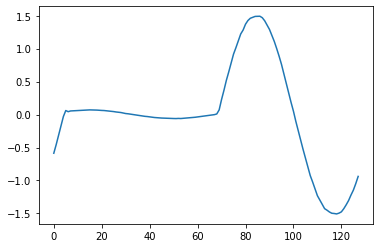

In [ ]:
plt.plot(train_sc[0])
plt.show()

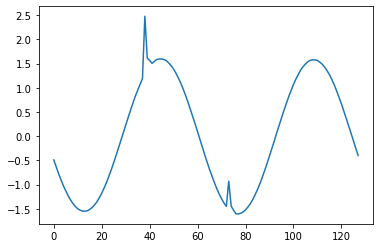

In [ ]:
plt.plot(train_sc[2])
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(72,activation='relu',input_dim=128))
model2.add(Dense(48,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(16,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(6, activation='softmax'))

In [ ]:
model2.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["accuracy"])
model2.fit(scaler.transform(x_train),y_train1,batch_size=32,epochs=50,verbose=1)

Epoch 1/50
252/252 [==============================] - 1s 1ms/step - loss: 1.5938 - accuracy: 0.2921
Epoch 2/50
252/252 [==============================] - 0s 1ms/step - loss: 1.2115 - accuracy: 0.3934
Epoch 3/50
252/252 [==============================] - 0s 1ms/step - loss: 1.1562 - accuracy: 0.4110
Epoch 4/50
252/252 [==============================] - 0s 1ms/step - loss: 1.1616 - accuracy: 0.4025
Epoch 5/50
252/252 [==============================] - 0s 1ms/step - loss: 1.1343 - accuracy: 0.4320
Epoch 6/50
252/252 [==============================] - 0s 1ms/step - loss: 1.0875 - accuracy: 0.4861
Epoch 7/50
252/252 [==============================] - 0s 1ms/step - loss: 0.9582 - accuracy: 0.5979
Epoch 8/50
252/252 [==============================] - 0s 1ms/step - loss: 0.8375 - accuracy: 0.6398
Epoch 9/50
252/252 [==============================] - 0s 1ms/step - loss: 0.7095 - accuracy: 0.7035
Epoch 10/50
252/252 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7222

In [ ]:
metrics=model2.evaluate(scaler.transform(x_train),np_utils.to_categorical(np.array(y_train),6),verbose=1)
print()
print("%s: %.2f%%" % (model2.metrics_names[1], metrics[1]*100))
predictions = model2.predict(x_train)

252/252 [==============================] - 0s 820us/step - loss: 0.0142 - accuracy: 0.9979

accuracy: 99.79%


In [ ]:
metrics=model2.evaluate(scaler.transform(x_test),np_utils.to_categorical(np.array(y_test),6),verbose=1)
print()
print("%s: %.2f%%" % (model2.metrics_names[1], metrics[1]*100))
predictions = model2.predict(x_test)

124/124 [==============================] - 0s 858us/step - loss: 0.0156 - accuracy: 0.9970

accuracy: 99.70%


In [ ]:
model2.save('seventh_9.h5')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,out_data,test_size=0.33, random_state=50)

In [ ]:
metrics=model2.evaluate(scaler.transform(x_test),np_utils.to_categorical(np.array(y_test),6),verbose=1)
print()
print("%s: %.2f%%" % (model2.metrics_names[1], metrics[1]*100))
predictions = model2.predict(x_test)

124/124 [==============================] - 0s 868us/step - loss: 0.0145 - accuracy: 0.9980

accuracy: 99.80%


#### Final Accuracy Obtained for Test data: 99.80% 
#### Final Accuracy Obtained for Test data: 99.79%
#### Total Parameters: 12,610